In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carsales.csv')

In [3]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [7]:
df.tail()

,Month,Sales
100,1968-08-01,16722
101,1968-09-01,14385
102,1968-10-01,21342
103,1968-11-01,17180
104,1968-12-01,14577


In [8]:
df['year'] = df['Month'].dt.year

In [9]:
df.head()

,Month,Sales,year
0,1960-01-01,6550,1960
1,1960-02-01,8728,1960
2,1960-03-01,12026,1960
3,1960-04-01,14395,1960
4,1960-05-01,14587,1960


In [10]:
df['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968], dtype=int64)

<Axes: ylabel='Sales'>

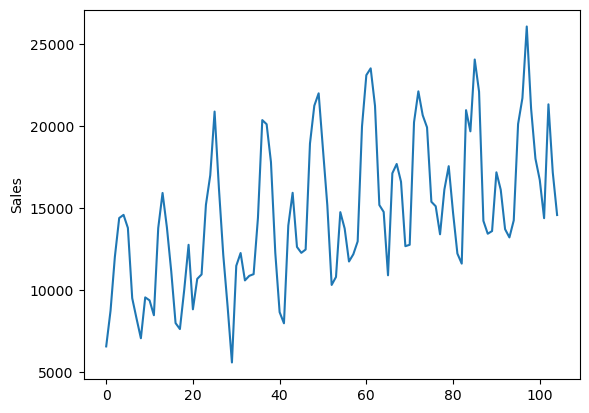

In [12]:
sns.lineplot(df['Sales'])

In [24]:
df[df['year']==1961]['Sales']

12    13784
13    15926
14    13821
15    11143
16     7975
17     7610
18    10015
19    12759
20     8816
Name: Sales, dtype: int64

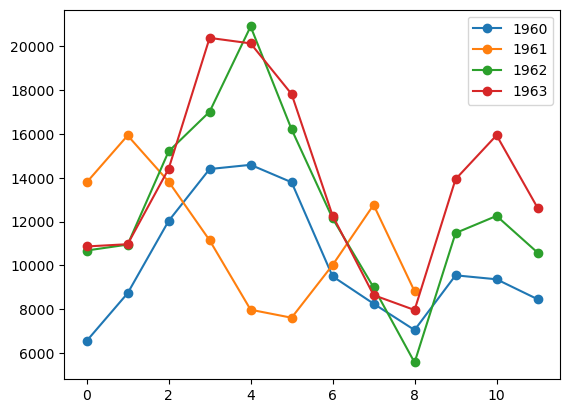

In [27]:
plt.plot(df[df['year']==1960]['Sales'].values,marker='o',label='1960')
plt.plot(df[df['year']==1961]['Sales'].values,marker='o',label='1961')
plt.plot(df[df['year']==1962]['Sales'].values,marker='o',label='1962')
plt.plot(df[df['year']==1963]['Sales'].values,marker='o',label='1963')
plt.legend()
plt.show()

In [28]:
df.isnull().sum()

Month    0
Sales    0
year     0
dtype: int64

In [29]:
df[df['year']==1961]

,Month,Sales,year
12,1961-04-01,13784,1961
13,1961-05-01,15926,1961
14,1961-06-01,13821,1961
15,1961-07-01,11143,1961
16,1961-08-01,7975,1961
17,1961-09-01,7610,1961
18,1961-10-01,10015,1961
19,1961-11-01,12759,1961
20,1961-12-01,8816,1961


In [34]:
dt_df = pd.date_range(start='1960-01-01', end='1968-12-01',freq='M')

In [35]:
dt_df.shape

(107,)

In [37]:
dt_df = pd.DataFrame(dt_df)


In [39]:
dt_df.columns = ['date']

In [40]:
dt_df.head()

,date
0,1960-01-31
1,1960-02-29
2,1960-03-31
3,1960-04-30
4,1960-05-31


In [41]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    107 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 984.0 bytes


In [42]:
dt_df.values[1]

array(['1960-02-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [44]:
dt_df['date'] = dt_df['date'].apply(lambda x: '-'.join(str(x).split('-')[:-1]))

In [45]:
dt_df.head()

,date
0,1960-01
1,1960-02
2,1960-03
3,1960-04
4,1960-05


In [46]:
dt_df['date'] = pd.to_datetime(dt_df['date'])
dt_df.head(3)

,date
0,1960-01-01
1,1960-02-01
2,1960-03-01


In [47]:
df.head()

,Month,Sales,year
0,1960-01-01,6550,1960
1,1960-02-01,8728,1960
2,1960-03-01,12026,1960
3,1960-04-01,14395,1960
4,1960-05-01,14587,1960


In [48]:
df1 = dt_df.merge(df,left_on=['date'],right_on=['Month'],how='left')

In [49]:
df1.shape, dt_df.shape, df.shape

((107, 4), (107, 1), (105, 3))

In [50]:
df1.head()

,date,Month,Sales,year
0,1960-01-01,1960-01-01,6550.0,1960.0
1,1960-02-01,1960-02-01,8728.0,1960.0
2,1960-03-01,1960-03-01,12026.0,1960.0
3,1960-04-01,1960-04-01,14395.0,1960.0
4,1960-05-01,1960-05-01,14587.0,1960.0


In [51]:
df1.isnull().sum()

date     0
Month    3
Sales    3
year     3
dtype: int64

In [53]:
df1[df1['Month'].isnull()]

,date,Month,Sales,year
12,1961-01-01,NaT,NaN,NaN
13,1961-02-01,NaT,NaN,NaN
14,1961-03-01,NaT,NaN,NaN


In [54]:
df1['Sales'].mean()

14742.759615384615

In [56]:
df1.iloc[:20,:]

,date,Month,Sales,year
0,1960-01-01,1960-01-01,6550.0,1960.0
1,1960-02-01,1960-02-01,8728.0,1960.0
2,1960-03-01,1960-03-01,12026.0,1960.0
3,1960-04-01,1960-04-01,14395.0,1960.0
4,1960-05-01,1960-05-01,14587.0,1960.0
5,1960-06-01,1960-06-01,13791.0,1960.0
6,1960-07-01,1960-07-01,9498.0,1960.0
7,1960-08-01,1960-08-01,8251.0,1960.0
8,1960-09-01,1960-09-01,7049.0,1960.0
9,1960-10-01,1960-10-01,9545.0,1960.0


## For Missing Values in Time Series data we opt for ffill or bfill using fillna functions

In [59]:
df1.fillna(method='ffill',inplace=True)

In [60]:
df1.iloc[:20,:]

,date,Month,Sales,year
0,1960-01-01,1960-01-01,6550.0,1960.0
1,1960-02-01,1960-02-01,8728.0,1960.0
2,1960-03-01,1960-03-01,12026.0,1960.0
3,1960-04-01,1960-04-01,14395.0,1960.0
4,1960-05-01,1960-05-01,14587.0,1960.0
5,1960-06-01,1960-06-01,13791.0,1960.0
6,1960-07-01,1960-07-01,9498.0,1960.0
7,1960-08-01,1960-08-01,8251.0,1960.0
8,1960-09-01,1960-09-01,7049.0,1960.0
9,1960-10-01,1960-10-01,9545.0,1960.0


In [61]:
df1 = df1[['date','Sales']]

In [62]:
df1['year'] = df1['date'].dt.year

C:\Users\Hp\AppData\Local\Temp\ipykernel_2588\1795061069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['date'].dt.year


In [64]:
df1.iloc[:20,:]

,date,Sales,year
0,1960-01-01,6550.0,1960
1,1960-02-01,8728.0,1960
2,1960-03-01,12026.0,1960
3,1960-04-01,14395.0,1960
4,1960-05-01,14587.0,1960
5,1960-06-01,13791.0,1960
6,1960-07-01,9498.0,1960
7,1960-08-01,8251.0,1960
8,1960-09-01,7049.0,1960
9,1960-10-01,9545.0,1960


## Implementing Dicky Fuller Test

In [65]:
from statsmodels.tsa.stattools import adfuller

In [78]:
datapoints = adfuller(df1['Sales'],maxlag=6)

In [79]:
datapoints

(-3.090237767165515,
 0.02728412340590771,
 5,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 1874.8091291394346)

In [80]:
p_value = datapoints[1]
p_value

0.02728412340590771

In [81]:
labels = ['test_parameters','p_value','lags_used','dataobs']
d = dict(zip(labels,datapoints[:4]))

In [82]:
d

{'test_parameters': -3.090237767165515,
 'p_value': 0.02728412340590771,
 'lags_used': 5,
 'dataobs': 101}

In [83]:
if(d['p_value']>0.05):
    print('The time series is non-stationary')
else:
    print('The time series is stationary')

The time series is stationary


In [74]:
df1.head()

,date,Sales,year
0,1960-01-01,6550.0,1960
1,1960-02-01,8728.0,1960
2,1960-03-01,12026.0,1960
3,1960-04-01,14395.0,1960
4,1960-05-01,14587.0,1960


In [75]:
df1['lags_6'] = df1['Sales']-df1['Sales'].shift(6)
df1['lags_12'] = df1['Sales']-df1['Sales'].shift(12)

In [76]:
df1.head(15)

,date,Sales,year,lags_6,lags_12
0,1960-01-01,6550.0,1960,NaN,NaN
1,1960-02-01,8728.0,1960,NaN,NaN
2,1960-03-01,12026.0,1960,NaN,NaN
3,1960-04-01,14395.0,1960,NaN,NaN
4,1960-05-01,14587.0,1960,NaN,NaN
5,1960-06-01,13791.0,1960,NaN,NaN
6,1960-07-01,9498.0,1960,2948.0,NaN
7,1960-08-01,8251.0,1960,-477.0,NaN
8,1960-09-01,7049.0,1960,-4977.0,NaN
9,1960-10-01,9545.0,1960,-4850.0,NaN


In [77]:
9498-6550

2948

In [85]:
df1.head()

,date,Sales,year,lags_6,lags_12
0,1960-01-01,6550.0,1960,NaN,NaN
1,1960-02-01,8728.0,1960,NaN,NaN
2,1960-03-01,12026.0,1960,NaN,NaN
3,1960-04-01,14395.0,1960,NaN,NaN
4,1960-05-01,14587.0,1960,NaN,NaN


In [86]:
df1 = df1[['date','Sales']]
df1.reset_index(drop=True,inplace=True)
df1.head()

,date,Sales
0,1960-01-01,6550.0
1,1960-02-01,8728.0
2,1960-03-01,12026.0
3,1960-04-01,14395.0
4,1960-05-01,14587.0


In [87]:
df1.shape

(107, 2)

In [88]:
0.80*107 , 0.20*107

(85.60000000000001, 21.400000000000002)

In [89]:
107-85

22

In [90]:
train = df1.iloc[:86]
test = df1.iloc[86:]

In [91]:
train.head()

,date,Sales
0,1960-01-01,6550.0
1,1960-02-01,8728.0
2,1960-03-01,12026.0
3,1960-04-01,14395.0
4,1960-05-01,14587.0


In [92]:
test.head()

,date,Sales
86,1967-03-01,20985.0
87,1967-04-01,19692.0
88,1967-05-01,24081.0
89,1967-06-01,22114.0
90,1967-07-01,14220.0


## ACF : Auto Correlation Function
## PACF : Partial Auto Correlation Function 

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sn

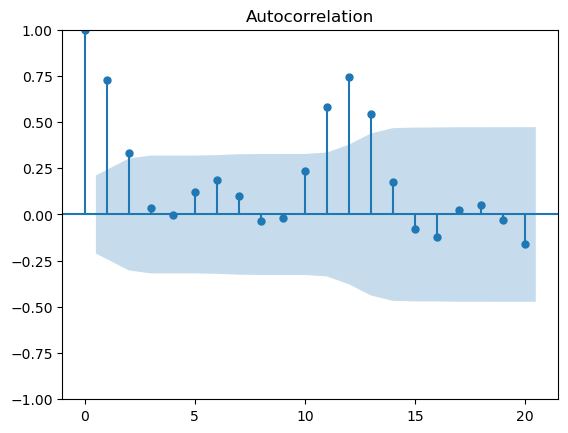

In [97]:
## ACF PLOT
fig = sn.graphics.tsa.plot_acf(train['Sales'])

In [ ]:
q= 3


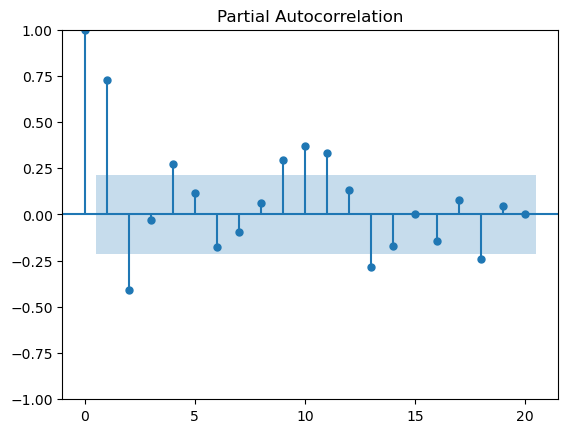

In [98]:
## PACF PLOT
fig = sn.graphics.tsa.plot_pacf(train['Sales'])

In [ ]:
p = 3

In [93]:
from statsmodels.tsa.arima.model import ARIMA

In [132]:
arima = ARIMA(train['Sales'],order=(3,0,3))

In [133]:
model = arima.fit()

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [134]:
train.tail()

,date,Sales,forecast
81,1966-10-01,16135.0,NaN
82,1966-11-01,17562.0,NaN
83,1966-12-01,14720.0,NaN
84,1967-01-01,12225.0,NaN
85,1967-02-01,11608.0,NaN


In [135]:
test.tail()

,date,Sales
102,1968-07-01,18024.0
103,1968-08-01,16722.0
104,1968-09-01,14385.0
105,1968-10-01,21342.0
106,1968-11-01,17180.0


In [136]:
train_s = train[['date','Sales']]
train_s.head()

,date,Sales
0,1960-01-01,6550.0
1,1960-02-01,8728.0
2,1960-03-01,12026.0
3,1960-04-01,14395.0
4,1960-05-01,14587.0


In [137]:
train_s.tail()

,date,Sales
81,1966-10-01,16135.0
82,1966-11-01,17562.0
83,1966-12-01,14720.0
84,1967-01-01,12225.0
85,1967-02-01,11608.0


In [138]:
train_s = pd.concat([train_s,test],axis=0)
train_s.tail()

,date,Sales
102,1968-07-01,18024.0
103,1968-08-01,16722.0
104,1968-09-01,14385.0
105,1968-10-01,21342.0
106,1968-11-01,17180.0


In [139]:
train_s['forecast'] = model.predict(start=86,end=106,dynamic=True)

In [140]:
train_s.tail()

,date,Sales,forecast
102,1968-07-01,18024.0,12662.972085
103,1968-08-01,16722.0,12638.138063
104,1968-09-01,14385.0,13695.980127
105,1968-10-01,21342.0,14722.116872
106,1968-11-01,17180.0,14684.377058


In [141]:
train_s.isnull().sum()

date         0
Sales        0
forecast    86
dtype: int64

<Axes: >

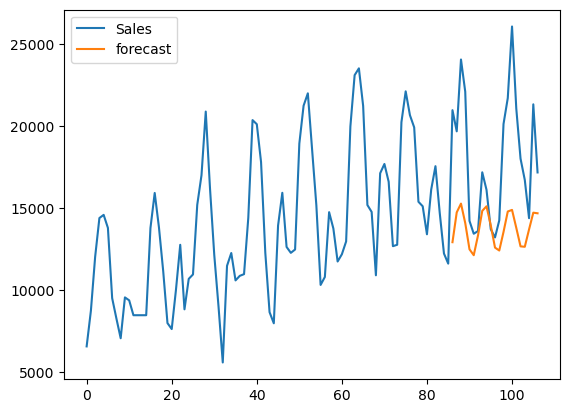

In [142]:
train_s[['Sales','forecast']].plot()

In [143]:
from sklearn.metrics import mean_absolute_percentage_error

In [144]:
mean_absolute_percentage_error(train_s.iloc[86:107,1],train_s.iloc[86:107,2])

0.21256456264897042

## Prophet Algorithm

In [145]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [146]:
df.head()

,date,meantemp
0,01-01-2013,10.000000
1,02-01-2013,7.400000
2,03-01-2013,7.166667
3,04-01-2013,8.666667
4,05-01-2013,6.000000


In [147]:
df.tail()

,date,meantemp
1453,28-12-2016,17.217391
1454,29-12-2016,15.238095
1455,30-12-2016,14.095238
1456,31-12-2016,15.052632
1457,01-01-2017,10.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1458 non-null   object 
 1   meantemp  1458 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.9+ KB


In [148]:
df.isnull().sum()

date        0
meantemp    0
dtype: int64

In [151]:
dt_df = pd.date_range(start ='2013-01-01',end='2017-01-01',freq='D')
dt_df = pd.DataFrame(dt_df)
dt_df.head()

,0
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [162]:
dt_df.columns = ['date_']

In [163]:
dt_df.tail()

,date_
1457,2016-12-28
1458,2016-12-29
1459,2016-12-30
1460,2016-12-31
1461,2017-01-01


In [155]:
df['date_'] = df['date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2588\1859900312.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_'] = df['date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))


,date,meantemp,date_
0,01-01-2013,10.000000,2013-01-01
1,02-01-2013,7.400000,2013-02-01
2,03-01-2013,7.166667,2013-03-01
3,04-01-2013,8.666667,2013-04-01
4,05-01-2013,6.000000,2013-05-01


In [156]:
df.tail()

,date,meantemp,date_
1453,28-12-2016,17.217391,2016-12-28
1454,29-12-2016,15.238095,2016-12-29
1455,30-12-2016,14.095238,2016-12-30
1456,31-12-2016,15.052632,2016-12-31
1457,01-01-2017,10.000000,2017-01-01


In [158]:
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.5 KB


In [160]:
df['date_'] = pd.to_datetime(df['date_'])

In [161]:
df.tail()

,date,meantemp,date_
1453,28-12-2016,17.217391,2016-12-28
1454,29-12-2016,15.238095,2016-12-29
1455,30-12-2016,14.095238,2016-12-30
1456,31-12-2016,15.052632,2016-12-31
1457,01-01-2017,10.000000,2017-01-01


In [164]:
df_all = df.merge(dt_df, on='date_',how='right')
df_all.head()

,date,meantemp,date_
0,01-01-2013,10.000000,2013-01-01
1,01-02-2013,16.000000,2013-01-02
2,01-03-2013,17.333333,2013-01-03
3,01-04-2013,25.375000,2013-01-04
4,01-05-2013,31.857143,2013-01-05


In [165]:
df.shape, dt_df.shape, df_all.shape

((1458, 3), (1462, 1), (1462, 3))

In [166]:
df_all[df_all['date'].isnull()]

,date,meantemp,date_
19,NaN,NaN,2013-01-20
20,NaN,NaN,2013-01-21
21,NaN,NaN,2013-01-22
22,NaN,NaN,2013-01-23


In [167]:
df_all.iloc[:25]

,date,meantemp,date_
0,01-01-2013,10.000000,2013-01-01
1,01-02-2013,16.000000,2013-01-02
2,01-03-2013,17.333333,2013-01-03
3,01-04-2013,25.375000,2013-01-04
4,01-05-2013,31.857143,2013-01-05
5,01-06-2013,32.000000,2013-01-06
6,01-07-2013,33.857143,2013-01-07
7,01-08-2013,30.000000,2013-01-08
8,01-09-2013,30.000000,2013-01-09
9,01-10-2013,28.285714,2013-01-10


In [168]:
df_all.fillna(method='ffill',inplace=True)

In [169]:
df_all.iloc[:25]

,date,meantemp,date_
0,01-01-2013,10.000000,2013-01-01
1,01-02-2013,16.000000,2013-01-02
2,01-03-2013,17.333333,2013-01-03
3,01-04-2013,25.375000,2013-01-04
4,01-05-2013,31.857143,2013-01-05
5,01-06-2013,32.000000,2013-01-06
6,01-07-2013,33.857143,2013-01-07
7,01-08-2013,30.000000,2013-01-08
8,01-09-2013,30.000000,2013-01-09
9,01-10-2013,28.285714,2013-01-10


In [170]:
df_all = df_all[['date_','meantemp']]
df_all.head()

,date_,meantemp
0,2013-01-01,10.000000
1,2013-01-02,16.000000
2,2013-01-03,17.333333
3,2013-01-04,25.375000
4,2013-01-05,31.857143


In [171]:
df_all.columns =['ds','y']
df_all.head()

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,16.000000
2,2013-01-03,17.333333
3,2013-01-04,25.375000
4,2013-01-05,31.857143


In [172]:
df_all.shape

(1462, 2)

In [173]:
0.80*1462, 0.20*1462

(1169.6000000000001, 292.40000000000003)

In [270]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1462 non-null   datetime64[ns]
 1   y       1462 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.3 KB


In [271]:
df_all['month'] = df_all['ds'].dt.month
df_all['year'] = df_all['ds'].dt.year
df_all['dayofweek'] = df_all['ds'].dt.dayofweek

In [272]:
df_all.head()

,ds,y,month,year,dayofweek
0,2013-01-01,10.000000,1,2013,1
1,2013-01-02,16.000000,1,2013,2
2,2013-01-03,17.333333,1,2013,3
3,2013-01-04,25.375000,1,2013,4
4,2013-01-05,31.857143,1,2013,5


In [281]:
trainx = df_all.iloc[0:1170]
trainy = df_all.iloc[0:1170,1]

testx = df_all.iloc[1170:]
testy = df_all.iloc[1170:,1]

In [274]:
trainx.shape,trainy.shape, testx.shape, testy.shape

((1170, 5), (1170,), (292,), (292,))

In [275]:
from prophet import Prophet

In [276]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'labourday',
  'ds': pd.to_datetime(['2013-05-01', '2013-05-01',
                        '2015-05-01', '2016-05-01',
                       '2017-05-01', '2018-05-01',
                       '2019-05-01', '2020-05-01']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'chritmax',
  'ds': pd.to_datetime(['2013-12-25', '2014-12-25',
                        '2015-12-25', '2016-12-25',
                       '2017-12-25', '2018-12-25',
                       '2019-12-25', '2020-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [277]:
model = Prophet(holidays=holidays)
model.add_country_holidays(country_name='IN')

C:\Users\Hp\anaconda3\lib\site-packages\holidays\countries\india.py:101: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


In [278]:
model.add_regressor('month')
model.add_regressor('year')
model.add_regressor('dayofweek')

C:\Users\Hp\anaconda3\lib\site-packages\holidays\countries\india.py:101: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


In [279]:
model.fit(trainx)

11:57:13 - cmdstanpy - INFO - Chain [1] start processing
11:57:13 - cmdstanpy - INFO - Chain [1] done processing


In [280]:
testx

1170   2016-03-16
1171   2016-03-17
1172   2016-03-18
1173   2016-03-19
1174   2016-03-20
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: ds, Length: 292, dtype: datetime64[ns]

In [285]:
test_x = pd.DataFrame(testx)
# testx.columns = ['ds']
test_x.head()

,ds,y,month,year,dayofweek
1170,2016-03-16,23.937500,3,2016,2
1171,2016-03-17,26.312500,3,2016,3
1172,2016-03-18,26.187500,3,2016,4
1173,2016-03-19,26.785714,3,2016,5
1174,2016-03-20,27.133333,3,2016,6


In [286]:
pred= model.predict(test_x)

In [287]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,year,year_lower,year_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-16,33.934500,17.865371,32.715956,33.934500,33.934500,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.219150,-7.219150,-7.219150,0.0,0.0,0.0,25.860168
1,2016-03-17,33.948390,18.728243,33.326181,33.948390,33.948390,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.119410,-7.119410,-7.119410,0.0,0.0,0.0,25.836746
2,2016-03-18,33.962281,18.467237,33.039537,33.962281,33.962281,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.046727,-7.046727,-7.046727,0.0,0.0,0.0,25.741049
3,2016-03-19,33.976172,18.893473,33.408965,33.976172,33.976172,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.998821,-6.998821,-6.998821,0.0,0.0,0.0,25.793001
4,2016-03-20,33.990062,19.268305,33.377485,33.990062,33.990062,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.972658,-6.972658,-6.972658,0.0,0.0,0.0,26.473124


In [282]:
test = df_all.iloc[1170:]

In [283]:
test.head()

,ds,y,month,year,dayofweek
1170,2016-03-16,23.937500,3,2016,2
1171,2016-03-17,26.312500,3,2016,3
1172,2016-03-18,26.187500,3,2016,4
1173,2016-03-19,26.785714,3,2016,5
1174,2016-03-20,27.133333,3,2016,6


In [284]:
test.reset_index(drop=True,inplace=True)

In [288]:
test['pred'] = pred['yhat']

C:\Users\Hp\AppData\Local\Temp\ipykernel_2588\2220655663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = pred['yhat']


In [289]:
test.head()

,ds,y,month,year,dayofweek,pred
0,2016-03-16,23.937500,3,2016,2,25.860168
1,2016-03-17,26.312500,3,2016,3,25.836746
2,2016-03-18,26.187500,3,2016,4,25.741049
3,2016-03-19,26.785714,3,2016,5,25.793001
4,2016-03-20,27.133333,3,2016,6,26.473124


<Axes: >

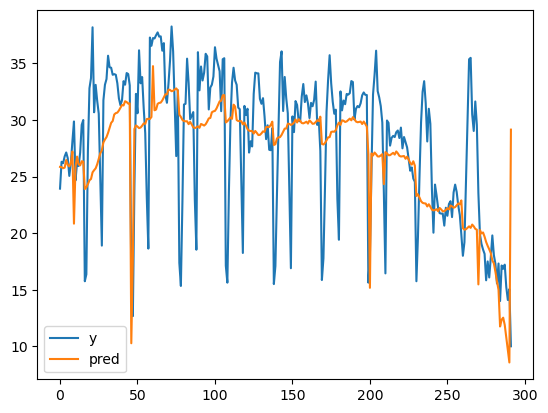

In [290]:
test[['y','pred']].plot()

In [255]:
mean_absolute_percentage_error(test['y'],test['pred'])

0.15458175509760258

In [291]:
future_df = model.make_future_dataframe(periods = 10,include_history=False)

In [295]:
future_df['month'] = future_df['ds'].dt.month
future_df['year'] = future_df['ds'].dt.year
future_df['dayofweek'] = future_df['ds'].dt.dayofweek

In [296]:
predict_data = model.predict(future_df)

In [297]:
predict_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,year,year_lower,year_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-16,33.934500,18.862864,33.196168,33.934500,33.934500,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.219150,-7.219150,-7.219150,0.0,0.0,0.0,25.860168
1,2016-03-17,33.948390,18.610433,33.184649,33.948390,33.948390,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.119410,-7.119410,-7.119410,0.0,0.0,0.0,25.836746
2,2016-03-18,33.962281,18.762482,32.643135,33.962281,33.962281,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.046727,-7.046727,-7.046727,0.0,0.0,0.0,25.741049
3,2016-03-19,33.976172,18.829281,33.267635,33.976172,33.976172,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.998821,-6.998821,-6.998821,0.0,0.0,0.0,25.793001
4,2016-03-20,33.990062,19.583553,33.160860,33.990062,33.990062,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.972658,-6.972658,-6.972658,0.0,0.0,0.0,26.473124
5,2016-03-21,34.003953,18.971702,33.379771,34.003953,34.003953,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.964531,-6.964531,-6.964531,0.0,0.0,0.0,26.043292
6,2016-03-22,34.017844,18.789022,33.386105,34.017844,34.017844,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.970163,-6.970163,-6.970163,0.0,0.0,0.0,25.901574
7,2016-03-23,34.031735,18.952450,33.248736,34.031735,34.031735,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.984834,-6.984834,-6.984834,0.0,0.0,0.0,26.191719
8,2016-03-24,34.045625,19.632839,34.045865,34.045625,34.045625,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.003507,-7.003507,-7.003507,0.0,0.0,0.0,27.216848
9,2016-03-25,34.059516,13.748160,27.753987,34.059516,34.059516,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.020979,-7.020979,-7.020979,0.0,0.0,0.0,20.840699


In [298]:
predict_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura* (*estimated),...,year,year_lower,year_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5,2016-03-21,34.003953,18.971702,33.379771,34.003953,34.003953,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.964531,-6.964531,-6.964531,0.0,0.0,0.0,26.043292
6,2016-03-22,34.017844,18.789022,33.386105,34.017844,34.017844,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.970163,-6.970163,-6.970163,0.0,0.0,0.0,25.901574
7,2016-03-23,34.031735,18.952450,33.248736,34.031735,34.031735,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-6.984834,-6.984834,-6.984834,0.0,0.0,0.0,26.191719
8,2016-03-24,34.045625,19.632839,34.045865,34.045625,34.045625,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.003507,-7.003507,-7.003507,0.0,0.0,0.0,27.216848
9,2016-03-25,34.059516,13.748160,27.753987,34.059516,34.059516,0.0,0.0,0.0,0.0,...,-8.742855,-8.742855,-8.742855,-7.020979,-7.020979,-7.020979,0.0,0.0,0.0,20.840699


In [226]:
predict_data = predict_data.iloc[-10:]

In [227]:
predict_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1170,2016-03-16,25.644373,17.826038,33.121341,25.644373,25.644373,-0.393778,-0.393778,-0.393778,0.061054,0.061054,0.061054,-0.454832,-0.454832,-0.454832,0.0,0.0,0.0,25.250595
1171,2016-03-17,25.645335,17.317657,32.823645,25.645335,25.645335,-0.334764,-0.334764,-0.334764,-0.006950,-0.006950,-0.006950,-0.327814,-0.327814,-0.327814,0.0,0.0,0.0,25.310571
1172,2016-03-18,25.646297,17.162609,32.782940,25.646297,25.646297,-0.361939,-0.361939,-0.361939,-0.138924,-0.138924,-0.138924,-0.223015,-0.223015,-0.223015,0.0,0.0,0.0,25.284358
1173,2016-03-19,25.647259,17.259391,33.558879,25.647259,25.647259,-0.181082,-0.181082,-0.181082,-0.039944,-0.039944,-0.039944,-0.141138,-0.141138,-0.141138,0.0,0.0,0.0,25.466178
1174,2016-03-20,25.648221,17.997818,33.913557,25.648221,25.648221,0.088772,0.088772,0.088772,0.170872,0.170872,0.170872,-0.082100,-0.082100,-0.082100,0.0,0.0,0.0,25.736994
1175,2016-03-21,25.649184,17.415562,33.121120,25.649184,25.649184,-0.002297,-0.002297,-0.002297,0.042738,0.042738,0.042738,-0.045035,-0.045035,-0.045035,0.0,0.0,0.0,25.646887
1176,2016-03-22,25.650146,17.346352,32.938577,25.650146,25.650146,-0.117170,-0.117170,-0.117170,-0.088847,-0.088847,-0.088847,-0.028322,-0.028322,-0.028322,0.0,0.0,0.0,25.532976
1177,2016-03-23,25.651108,17.822062,33.032521,25.651108,25.651108,0.031420,0.031420,0.031420,0.061054,0.061054,0.061054,-0.029634,-0.029634,-0.029634,0.0,0.0,0.0,25.682528
1178,2016-03-24,25.652070,18.685431,33.245394,25.652070,25.652070,-0.052962,-0.052962,-0.052962,-0.006950,-0.006950,-0.006950,-0.046012,-0.046012,-0.046012,0.0,0.0,0.0,25.599108
1179,2016-03-25,25.653033,18.032005,32.720851,25.653031,25.653033,-0.212884,-0.212884,-0.212884,-0.138924,-0.138924,-0.138924,-0.073960,-0.073960,-0.073960,0.0,0.0,0.0,25.440149


In [225]:
trainx.tail()

,ds,y
1165,2016-03-11,25.640000
1166,2016-03-12,21.208333
1167,2016-03-13,24.250000
1168,2016-03-14,22.375000
1169,2016-03-15,24.066667


## Darts

In [299]:
from darts import TimeSeries

In [300]:
from darts.models.forecasting.arima import ARIMA

In [302]:
from darts.dataprocessing.transformers.scaler import Scaler

In [303]:
df_all.head(3)

,ds,y,month,year,dayofweek
0,2013-01-01,10.000000,1,2013,1
1,2013-01-02,16.000000,1,2013,2
2,2013-01-03,17.333333,1,2013,3


In [304]:
df_all = df_all[['ds','y']]

In [305]:
df_all.head(4)

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,16.000000
2,2013-01-03,17.333333
3,2013-01-04,25.375000


In [312]:
series = TimeSeries.from_dataframe(df_all,'ds','y')

In [313]:
series

<TimeSeries (DataArray) (ds: 1462, component: 1, sample: 1)>
array([[[10.        ]],

       [[16.        ]],

       [[17.33333333]],

       ...,

       [[14.0952381 ]],

       [[15.05263158]],

       [[10.        ]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2013-01-01 2013-01-02 ... 2017-01-01
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [314]:
m = ARIMA()
m.fit(series)

ARIMA(p=12, d=1, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [315]:
m.predict(10)

<TimeSeries (DataArray) (ds: 10, component: 1, sample: 1)>
array([[[11.09238444]],

       [[12.27578635]],

       [[13.54158605]],

       [[13.75694152]],

       [[15.57399908]],

       [[14.83688893]],

       [[14.78679318]],

       [[14.36927044]],

       [[14.64774758]],

       [[13.9611946 ]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2017-01-02 2017-01-03 ... 2017-01-11
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [316]:
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing

In [317]:
exp_m = ExponentialSmoothing()

In [318]:
exp_m.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [319]:
exp_m.predict(10)

<TimeSeries (DataArray) (ds: 10, component: 1, sample: 1)>
array([[[ 9.94363813]],

       [[ 9.91679056]],

       [[10.11324254]],

       [[10.00409824]],

       [[ 9.92285723]],

       [[ 9.96285565]],

       [[10.05480416]],

       [[ 9.9429359 ]],

       [[ 9.91608833]],

       [[10.1125403 ]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2017-01-02 2017-01-03 ... 2017-01-11
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None